In [7]:
import os
import sys
import random
import math
import time
import numpy as np
!pip install --upgrade tensorflow
import cv2
import matplotlib.pyplot as plt
import pickle

from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log
sys.path.append('C:\Users\nemad\PycharmProjects\test\Mask_RCNN\samples\rocks\rocks.py')

import rocks

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
  ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


ImportError: No module named tensorflow

In [2]:
config = rocks.RocksConfig()
config.display()

valid_dataset = rocks.RocksDataset()
valid_dataset.load_rocks('C:\\Users\\nemad\\PycharmProjects\\test\\Mask_RCNN\\dataset', 'infer')

valid_dataset.prepare()

NameError: name 'rocks' is not defined

In [3]:
ROOT_DIR = os.path.abspath("../../")
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
class InferenceConfig(rocks.RocksConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

# Recreate the model in inference mode
model_pred = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Get path to saved weights
# Either set a specific path or find last trained weights
model_path = os.path.join(ROOT_DIR, "logs/rocks20190214T2140/mask_rcnn_rocks_1000.h5")
#model_path = model.find_last()

# Load trained weights
print("Loading weights from ", model_path)
model_pred.load_weights(model_path, by_name=True)

Loading weights from  /models/Mask_RCNN/logs/rocks20190214T2140/mask_rcnn_rocks_1000.h5
Re-starting from epoch 1000


In [4]:
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [20]:
instances = list()

for info in valid_dataset.image_info:
    image_id = info['id']
    image = cv2.imread(info['path'])
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(valid_dataset, inference_config, 
                           image_id, use_mini_mask=False)
    
    results = model_pred.detect([image], verbose=1)
    r = results[0]
    print(r['masks'].shape)
    
    ### display original image
    #original_image = visualize.display_instances(image, gt_bbox, gt_mask, gt_class_id, valid_dataset.class_names, figsize=(8, 8))
    ### display inference image
    #image = visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], valid_dataset.class_names, r['scores'], ax=get_ax())
    name = 'masked_' + info['path'].split('/')[-1]
    ### save inference image
    #cv2.imwrite("../../dataset/zhiang_c3/infer/"+name, image)
    
    
    ### get all instances
    image_name = info['path'].split('/')[-1]
    coord_str = image_name.split('.')[0]
    coord = coord_str.split('_')
    coord = [int(coord[0]), int(coord[1])]
    
    for i,bb in enumerate(r['rois']):
        instance = dict()
        instance['coord'] = coord
        instance['bb'] = bb
        mask = r['masks'][:,:,i].astype(float)
        mask = cv2.resize(mask, (400,400)).astype(bool)
        instance['mask']= mask
        instances.append(instance)
    print(len(instances))
    print('*'*20)


Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -120.70000  max:  131.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 17)
17
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    6.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -107.80000  max:  131.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 33)
50
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_i

(384, 384, 63)
839
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    4.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -112.80000  max:  131.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 72)
911
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -113.80000  max:  130.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 31)
942
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:  

(384, 384, 45)
1993
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -123.70000  max:  143.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 74)
2067
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 102)
2169
********************
Processing 1 images
image                    shape: (384, 384, 3)         mi

(384, 384, 55)
2969
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    2.00000  max:  223.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -110.80000  max:   99.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 0)
2969
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  232.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -116.80000  max:  108.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 0)
2969
********************
Processing 1 images
image                    shape: (384, 384, 3)         min: 

(384, 384, 86)
3825
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  235.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -112.80000  max:  111.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 4)
3829
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  247.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -116.80000  max:  123.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 7)
3836
********************
Processing 1 images
image                    shape: (384, 384, 3)         min: 

(384, 384, 117)
4592
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -115.80000  max:  130.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 63)
4655
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  253.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -105.80000  max:  129.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 6)
4661
********************
Processing 1 images
image                    shape: (384, 384, 3)         min

(384, 384, 34)
5359
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    1.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -115.80000  max:  131.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 23)
5382
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    1.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -112.80000  max:  131.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 60)
5442
********************
Processing 1 images
image                    shape: (384, 384, 3)         min

(384, 384, 44)
6126
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -123.70000  max:  133.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 42)
6168
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    6.00000  max:  253.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -117.70000  max:  146.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 75)
6243
********************
Processing 1 images
image                    shape: (384, 384, 3)         min

(384, 384, 1)
7082
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  218.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -108.80000  max:   94.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 2)
7084
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -116.80000  max:  133.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 41)
7125
********************
Processing 1 images
image                    shape: (384, 384, 3)         min: 

(384, 384, 90)
7839
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -123.70000  max:  147.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 76)
7915
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:   10.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -106.80000  max:  131.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 86)
8001
********************
Processing 1 images
image                    shape: (384, 384, 3)         min

(384, 384, 0)
8509
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  246.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -123.70000  max:  122.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 31)
8540
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -116.80000  max:  134.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 79)
8619
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:

(384, 384, 16)
9418
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -116.80000  max:  138.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 10)
9428
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  251.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -123.70000  max:  127.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 38)
9466
********************
Processing 1 images
image                    shape: (384, 384, 3)         min

(384, 384, 39)
10375
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -111.80000  max:  142.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 88)
10463
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  253.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -111.80000  max:  129.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 2)
10465
********************
Processing 1 images
image                    shape: (384, 384, 3)         m

(384, 384, 43)
11457
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  252.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -116.80000  max:  128.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 57)
11514
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    6.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -110.80000  max:  131.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 98)
11612
********************
Processing 1 images
image                    shape: (384, 384, 3)         

(384, 384, 91)
12516
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    9.00000  max:  254.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min:  -96.80000  max:  132.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 15)
12531
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  250.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -113.80000  max:  126.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 25)
12556
********************
Processing 1 images
image                    shape: (384, 384, 3)         

Processing 1 images
image                    shape: (384, 384, 3)         min:    2.00000  max:  228.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -110.80000  max:  104.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 0)
13231
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -114.80000  max:  131.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 14)
13245
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    1.00000  max:  255.00000  uint8
mol

(384, 384, 48)
14163
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  248.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -123.70000  max:  124.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 97)
14260
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    1.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -111.80000  max:  146.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 33)
14293
********************
Processing 1 images
image                    shape: (384, 384, 3)         

14913
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    3.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -113.80000  max:  131.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 59)
14972
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    1.00000  max:  254.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -115.80000  max:  130.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 65)
15037
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000

(384, 384, 44)
15989
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    1.00000  max:  227.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -109.70000  max:  103.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 2)
15991
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    2.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -112.80000  max:  131.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 30)
16021
********************
Processing 1 images
image                    shape: (384, 384, 3)         m

(384, 384, 2)
17018
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -123.70000  max:  130.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 25)
17043
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  250.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -123.70000  max:  126.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 21)
17064
********************
Processing 1 images
image                    shape: (384, 384, 3)         m

(384, 384, 67)
17865
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    5.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -111.80000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 12)
17877
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -116.80000  max:  131.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 38)
17915
********************
Processing 1 images
image                    shape: (384, 384, 3)         

(384, 384, 63)
18743
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    1.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -109.80000  max:  131.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 91)
18834
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  253.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -116.80000  max:  129.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 22)
18856
********************
Processing 1 images
image                    shape: (384, 384, 3)         

(384, 384, 58)
19679
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -116.80000  max:  133.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 80)
19759
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    8.00000  max:  236.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -100.80000  max:  112.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 3)
19762
********************
Processing 1 images
image                    shape: (384, 384, 3)         m

(384, 384, 20)
20368
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  232.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -113.80000  max:  108.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 1)
20369
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    1.00000  max:  254.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -115.80000  max:  131.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 60)
20429
********************
Processing 1 images
image                    shape: (384, 384, 3)         m

Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 61)
21322
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    2.00000  max:  222.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -109.80000  max:   98.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 0)
21322
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:   65.00000  max:  239.00000  uint8
mol

(384, 384, 77)
22050
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  234.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -111.80000  max:  115.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 3)
22053
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    4.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -112.80000  max:  133.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 90)
22143
********************
Processing 1 images
image                    shape: (384, 384, 3)         m

(384, 384, 73)
23153
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    4.00000  max:  240.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -109.80000  max:  123.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 2)
23155
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  221.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -113.80000  max:   97.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 0)
23155
********************
Processing 1 images
image                    shape: (384, 384, 3)         mi

(384, 384, 75)
24085
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    1.00000  max:  254.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -115.80000  max:  130.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 43)
24128
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    6.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -109.80000  max:  142.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 98)
24226
********************
Processing 1 images
image                    shape: (384, 384, 3)         

(384, 384, 38)
24916
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -113.80000  max:  130.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 73)
24989
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -116.80000  max:  136.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 40)
25029
********************
Processing 1 images
image                    shape: (384, 384, 3)         

(384, 384, 116)
25859
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:   20.00000  max:  254.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min:  -87.80000  max:  130.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 4)
25863
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 81)
25944
********************
Processing 1 images
image                    shape: (384, 384, 3)         

(384, 384, 35)
26697
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -116.80000  max:  132.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 44)
26741
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  225.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -116.80000  max:  101.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 3)
26744
********************
Processing 1 images
image                    shape: (384, 384, 3)         m

(384, 384, 75)
27543
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    2.00000  max:  254.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -114.80000  max:  133.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 82)
27625
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -115.80000  max:  131.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 78)
27703
********************
Processing 1 images
image                    shape: (384, 384, 3)         

(384, 384, 76)
28398
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -116.80000  max:  130.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 38)
28436
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  249.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -113.80000  max:  125.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 2)
28438
********************
Processing 1 images
image                    shape: (384, 384, 3)         m

(384, 384, 61)
29404
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    7.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -109.80000  max:  138.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 51)
29455
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    1.00000  max:  253.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -114.80000  max:  129.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 55)
29510
********************
Processing 1 images
image                    shape: (384, 384, 3)         

(384, 384, 0)
30171
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  250.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -123.70000  max:  126.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 38)
30209
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -113.80000  max:  130.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 20)
30229
********************
Processing 1 images
image                    shape: (384, 384, 3)         m

(384, 384, 31)
31099
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:   13.00000  max:  214.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -110.70000  max:   97.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 0)
31099
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  253.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -123.70000  max:  129.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 14)
31113
********************
Processing 1 images
image                    shape: (384, 384, 3)         m

(384, 384, 54)
31734
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -115.80000  max:  130.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 51)
31785
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -113.80000  max:  130.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 22)
31807
********************
Processing 1 images
image                    shape: (384, 384, 3)         

(384, 384, 9)
32525
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    1.00000  max:  252.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -122.70000  max:  136.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 92)
32617
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -116.80000  max:  131.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 90)
32707
********************
Processing 1 images
image                    shape: (384, 384, 3)         m

(384, 384, 68)
33373
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    6.00000  max:  253.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -115.70000  max:  142.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 79)
33452
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    4.00000  max:  228.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -113.70000  max:  117.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 3)
33455
********************
Processing 1 images
image                    shape: (384, 384, 3)         m

(384, 384, 118)
34296
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  252.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -115.80000  max:  128.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 31)
34327
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:   18.00000  max:  234.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min:  -99.70000  max:  110.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 5)
34332
********************
Processing 1 images
image                    shape: (384, 384, 3)         

(384, 384, 65)
35245
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    2.00000  max:  254.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -113.80000  max:  135.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 79)
35324
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -111.80000  max:  130.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 51)
35375
********************
Processing 1 images
image                    shape: (384, 384, 3)         

(384, 384, 22)
36030
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    4.00000  max:  253.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -110.80000  max:  145.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 59)
36089
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -114.80000  max:  131.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 68)
36157
********************
Processing 1 images
image                    shape: (384, 384, 3)         

(384, 384, 60)
37232
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    1.00000  max:  251.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -115.80000  max:  127.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 60)
37292
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -110.80000  max:  131.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 63)
37355
********************
Processing 1 images
image                    shape: (384, 384, 3)         

(384, 384, 0)
38151
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  241.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -123.70000  max:  117.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 1)
38152
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    7.00000  max:  254.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -109.80000  max:  137.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 132)
38284
********************
Processing 1 images
image                    shape: (384, 384, 3)         m

(384, 384, 64)
39169
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  243.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -107.80000  max:  119.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 1)
39170
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -116.80000  max:  133.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 67)
39237
********************
Processing 1 images
image                    shape: (384, 384, 3)         m

(384, 384, 37)
40031
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  241.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -114.80000  max:  117.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 1)
40032
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  225.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -112.80000  max:  101.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 0)
40032
********************
Processing 1 images
image                    shape: (384, 384, 3)         mi

(384, 384, 121)
40975
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -123.70000  max:  131.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 42)
41017
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -116.80000  max:  130.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 39)
41056
********************
Processing 1 images
image                    shape: (384, 384, 3)        

(384, 384, 68)
41875
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -116.80000  max:  131.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 80)
41955
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  252.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -112.80000  max:  128.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 45)
42000
********************
Processing 1 images
image                    shape: (384, 384, 3)         

(384, 384, 51)
42679
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -116.80000  max:  131.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 51)
42730
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -123.70000  max:  148.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 144)
42874
********************
Processing 1 images
image                    shape: (384, 384, 3)        

(384, 384, 58)
43713
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    5.00000  max:  225.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -102.80000  max:  101.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 0)
43713
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    1.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -115.80000  max:  131.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 90)
43803
********************
Processing 1 images
image                    shape: (384, 384, 3)         m

(384, 384, 3)
44788
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  252.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -123.70000  max:  128.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 32)
44820
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    7.00000  max:  254.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -109.80000  max:  144.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 97)
44917
********************
Processing 1 images
image                    shape: (384, 384, 3)         m

(384, 384, 67)
45813
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    3.00000  max:  254.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -112.80000  max:  130.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 82)
45895
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    1.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -112.80000  max:  131.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 42)
45937
********************
Processing 1 images
image                    shape: (384, 384, 3)         

(384, 384, 76)
46955
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -123.70000  max:  146.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 32)
46987
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    1.00000  max:  254.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -110.80000  max:  130.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 62)
47049
********************
Processing 1 images
image                    shape: (384, 384, 3)         

(384, 384, 79)
48048
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:   17.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min:  -95.80000  max:  139.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 32)
48080
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  249.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -116.80000  max:  125.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 1)
48081
********************
Processing 1 images
image                    shape: (384, 384, 3)         m

(384, 384, 12)
48891
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -116.80000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 88)
48979
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  228.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -116.80000  max:  104.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 0)
48979
********************
Processing 1 images
image                    shape: (384, 384, 3)         m

(384, 384, 87)
49705
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  253.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -111.80000  max:  129.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 41)
49746
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  252.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -123.70000  max:  128.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 25)
49771
********************
Processing 1 images
image                    shape: (384, 384, 3)         

(384, 384, 67)
50460
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -123.70000  max:  149.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 76)
50536
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -116.80000  max:  131.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 61)
50597
********************
Processing 1 images
image                    shape: (384, 384, 3)         

(384, 384, 70)
51313
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    4.00000  max:  254.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -112.80000  max:  135.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 64)
51377
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  253.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -123.70000  max:  129.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 42)
51419
********************
Processing 1 images
image                    shape: (384, 384, 3)         

(384, 384, 0)
52217
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    1.00000  max:  254.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -113.80000  max:  137.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 56)
52273
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  232.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -115.80000  max:  108.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 0)
52273
********************
Processing 1 images
image                    shape: (384, 384, 3)         mi

(384, 384, 74)
53086
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:   10.00000  max:  254.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min:  -99.80000  max:  130.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 50)
53136
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    9.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min:  -94.90000  max:  131.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 22)
53158
********************
Processing 1 images
image                    shape: (384, 384, 3)         

(384, 384, 6)
54009
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -123.70000  max:  141.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 107)
54116
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  250.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -115.80000  max:  126.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 76)
54192
********************
Processing 1 images
image                    shape: (384, 384, 3)         

(384, 384, 32)
55111
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  252.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -123.70000  max:  128.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 41)
55152
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -123.70000  max:  148.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 96)
55248
********************
Processing 1 images
image                    shape: (384, 384, 3)         

(384, 384, 76)
55988
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -114.80000  max:  131.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 61)
56049
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    5.00000  max:  254.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -114.70000  max:  137.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 97)
56146
********************
Processing 1 images
image                    shape: (384, 384, 3)         

Processing 1 images
image                    shape: (384, 384, 3)         min:   41.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min:  -64.80000  max:  140.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 32)
56843
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -113.80000  max:  131.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 69)
56912
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
mo

(384, 384, 3)
57745
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  248.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -123.70000  max:  124.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 4)
57749
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -115.80000  max:  132.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 67)
57816
********************
Processing 1 images
image                    shape: (384, 384, 3)         mi

(384, 384, 26)
58372
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    1.00000  max:  248.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -115.80000  max:  124.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 51)
58423
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -123.70000  max:  148.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 81)
58504
********************
Processing 1 images
image                    shape: (384, 384, 3)         

(384, 384, 0)
59229
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:   19.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min:  -93.80000  max:  134.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 41)
59270
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    4.00000  max:  254.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -112.80000  max:  130.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 30)
59300
********************
Processing 1 images
image                    shape: (384, 384, 3)         m

(384, 384, 57)
59967
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -115.80000  max:  135.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 92)
60059
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -115.80000  max:  130.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 57)
60116
********************
Processing 1 images
image                    shape: (384, 384, 3)         

(384, 384, 60)
60979
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  252.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -116.80000  max:  128.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 50)
61029
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    1.00000  max:  254.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -115.80000  max:  130.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 36)
61065
********************
Processing 1 images
image                    shape: (384, 384, 3)         

(384, 384, 66)
61869
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  252.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -116.80000  max:  128.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 8)
61877
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    7.00000  max:  232.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min:  -96.90000  max:  108.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 0)
61877
********************
Processing 1 images
image                    shape: (384, 384, 3)         mi

(384, 384, 84)
62675
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  253.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -115.80000  max:  129.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 46)
62721
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    3.00000  max:  254.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -110.80000  max:  142.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 121)
62842
********************
Processing 1 images
image                    shape: (384, 384, 3)        

(384, 384, 77)
63961
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -116.80000  max:  131.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 66)
64027
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    7.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -109.80000  max:  132.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 108)
64135
********************
Processing 1 images
image                    shape: (384, 384, 3)        

(384, 384, 10)
64937
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 100)
65037
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -115.80000  max:  130.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 44)
65081
********************
Processing 1 images
image                    shape: (384, 384, 3)        

(384, 384, 60)
66092
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    4.00000  max:  251.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -112.80000  max:  130.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 90)
66182
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    5.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -103.80000  max:  131.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 16)
66198
********************
Processing 1 images
image                    shape: (384, 384, 3)         

(384, 384, 75)
67031
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -116.80000  max:  142.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 75)
67106
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -116.80000  max:  130.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 64)
67170
********************
Processing 1 images
image                    shape: (384, 384, 3)         

(384, 384, 26)
68104
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    6.00000  max:  250.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -105.80000  max:  126.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 6)
68110
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    8.00000  max:  251.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -105.80000  max:  127.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 59)
68169
********************
Processing 1 images
image                    shape: (384, 384, 3)         m

(384, 384, 80)
68904
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -113.80000  max:  136.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 129)
69033
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    5.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -110.70000  max:  144.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 124)
69157
********************
Processing 1 images
image                    shape: (384, 384, 3)       

(384, 384, 63)
69826
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:   11.00000  max:  252.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min:  -99.80000  max:  128.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 28)
69854
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  253.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -115.80000  max:  129.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 18)
69872
********************
Processing 1 images
image                    shape: (384, 384, 3)         

(384, 384, 113)
70582
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -116.80000  max:  131.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 61)
70643
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -123.70000  max:  131.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 67)
70710
********************
Processing 1 images
image                    shape: (384, 384, 3)        

(384, 384, 22)
71551
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    1.00000  max:  253.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -115.80000  max:  129.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 48)
71599
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -112.80000  max:  130.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 3)
71602
********************
Processing 1 images
image                    shape: (384, 384, 3)         m

(384, 384, 31)
72370
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    2.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -113.80000  max:  140.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 93)
72463
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    8.00000  max:  234.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -106.80000  max:  110.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 0)
72463
********************
Processing 1 images
image                    shape: (384, 384, 3)         m

(384, 384, 53)
73175
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  252.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -116.80000  max:  128.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 31)
73206
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  229.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -108.80000  max:  105.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 0)
73206
********************
Processing 1 images
image                    shape: (384, 384, 3)         m

(384, 384, 74)
74013
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    3.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -112.80000  max:  131.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 67)
74080
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  238.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -114.80000  max:  114.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 0)
74080
********************
Processing 1 images
image                    shape: (384, 384, 3)         m

(384, 384, 73)
74794
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  249.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -116.80000  max:  125.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 72)
74866
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  252.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -115.80000  max:  128.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 101)
74967
********************
Processing 1 images
image                    shape: (384, 384, 3)        

(384, 384, 57)
75681
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    5.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -118.70000  max:  149.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 80)
75761
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    3.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -113.80000  max:  135.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 56)
75817
********************
Processing 1 images
image                    shape: (384, 384, 3)         

(384, 384, 84)
76492
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    7.00000  max:  229.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -107.80000  max:  105.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 1)
76493
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    2.00000  max:  254.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -114.80000  max:  130.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 57)
76550
********************
Processing 1 images
image                    shape: (384, 384, 3)         m

(384, 384, 69)
77237
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  232.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -114.80000  max:  108.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 0)
77237
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  234.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -116.80000  max:  110.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 1)
77238
********************
Processing 1 images
image                    shape: (384, 384, 3)         mi

(384, 384, 80)
77930
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    2.00000  max:  252.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -114.80000  max:  128.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 29)
77959
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    7.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -109.80000  max:  131.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 88)
78047
********************
Processing 1 images
image                    shape: (384, 384, 3)         

(384, 384, 18)
78828
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 91)
78919
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    4.00000  max:  226.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -113.70000  max:  102.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 1)
78920
********************
Processing 1 images
image                    shape: (384, 384, 3)         m

79741
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  250.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -116.80000  max:  126.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 44)
79785
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    5.00000  max:  254.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -111.80000  max:  130.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 82)
79867
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000

(384, 384, 62)
80574
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    1.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -115.80000  max:  137.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 71)
80645
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    4.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -110.80000  max:  137.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 52)
80697
********************
Processing 1 images
image                    shape: (384, 384, 3)         

(384, 384, 70)
81383
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -112.80000  max:  131.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 40)
81423
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    1.00000  max:  254.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -115.80000  max:  130.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 39)
81462
********************
Processing 1 images
image                    shape: (384, 384, 3)         

(384, 384, 70)
82165
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -116.80000  max:  136.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 61)
82226
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -116.80000  max:  131.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 71)
82297
********************
Processing 1 images
image                    shape: (384, 384, 3)         

(384, 384, 56)
83000
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  250.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -116.80000  max:  126.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 10)
83010
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    2.00000  max:  254.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -114.80000  max:  130.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 53)
83063
********************
Processing 1 images
image                    shape: (384, 384, 3)         

(384, 384, 67)
83654
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    1.00000  max:  248.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -110.80000  max:  124.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 17)
83671
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -120.70000  max:  143.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 76)
83747
********************
Processing 1 images
image                    shape: (384, 384, 3)         

(384, 384, 90)
84542
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    3.00000  max:  252.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -113.80000  max:  128.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 47)
84589
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  239.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -110.80000  max:  116.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 1)
84590
********************
Processing 1 images
image                    shape: (384, 384, 3)         m

(384, 384, 18)
85371
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  230.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -115.80000  max:  106.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 0)
85371
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    3.00000  max:  254.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -112.80000  max:  130.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 21)
85392
********************
Processing 1 images
image                    shape: (384, 384, 3)         m

(384, 384, 64)
86016
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    6.00000  max:  230.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -100.80000  max:  106.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 1)
86017
********************
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -116.80000  max:  131.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 75)
86092
********************


[360 165 370 179]


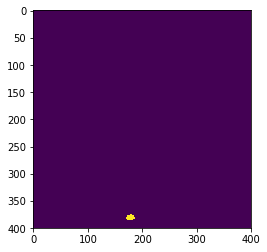

In [21]:
i = np.random.randint(len(instances))
print(instances[i]['bb'])
mask = instances[i]['mask']
plt.imshow(mask)
plt.show()


l = len(instances)
for i in range(0,l,10000):
    if l-i>10000:
        s = instances[i:i+10000]
    else:
        s = instances[i:]
    with open('instances_'+str(int(i/10000))+'.pickle', 'wb') as f:
        pickle.dump(s, f, protocol=pickle.HIGHEST_PROTOCOL)